In [1]:
import pandas as pd
import numpy as np
from analysis_utils import *


In [2]:
PAREDAO = "paredao4"
CAND1_PATH = "data/paredao4/babu.csv"
CAND2_PATH = "data/paredao4/victor_hugo.csv"
CAND3_PATH = "data/paredao4/lucas.csv"


In [3]:
candidate1_df = pd.read_csv(CAND1_PATH)
candidate2_df = pd.read_csv(CAND2_PATH)
candidate3_df = pd.read_csv(CAND3_PATH)

In [4]:
cand1 = candidate1_df[["tweet", "sentiment"]]
cand2 = candidate2_df[["tweet", "sentiment"]]
cand3 = candidate3_df[["tweet", "sentiment"]]

# Babu

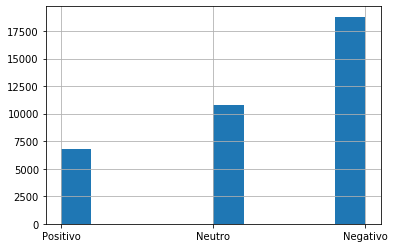

In [5]:
cand1["sentiment"].hist()

In [6]:
cand1

,tweet,sentiment
0,"Assisti umas 20 vezes, top,um dos melhores fil...",Positivo
1,Eu acho que fui muito específica 🤷🏾‍♀️,Positivo
2,Tatiane Melo,Neutro
3,Poderia sair 2\n.\n@BabuSantana e Lucas \nSeri...,Positivo
4,Qual o nome dela???,Neutro
...,...,...
36374,Babu cancelado ok? @HeartOnVenus1 #BBB20 #RedeBBB,Neutro
36375,"Não to aguentando mais a voz do Babu, sei lá j...",Negativo
36376,Babu falou que é o único da quebrada \n\nAí o ...,Neutro
36377,Guilherme e Babu palestrantes #BBB20,Neutro


# Victor Hugo

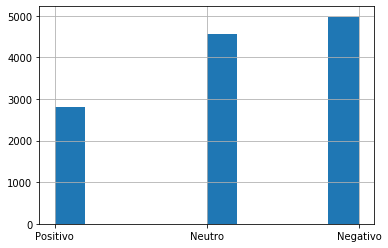

In [7]:
cand2["sentiment"].hist()

In [8]:
cand2

,tweet,sentiment
0,Eu acho que fui muito específica 🤷🏾‍♀️,Positivo
1,Tatiane Melo,Neutro
2,Qual o nome dela???,Neutro
3,Gente que mulher maravilhosaaaa é essa na foto...,Positivo
4,É sim. Pesquisei agora.,Neutro
...,...,...
12341,GUILHERME TA DOIDO PRA VOTAR NO VICTOR HUGO ME...,Negativo
12342,Esse cuzao vai vota no Victor Hugo #BBB20,Positivo
12343,"Lucas, Babu,Daniel e Victor Hugo podiam dar as...",Negativo
12344,"A THELMA FALANDO ""SEM PALESTRINHA DEPOIS DA VO...",Neutro


# Lucas (Eliminado)

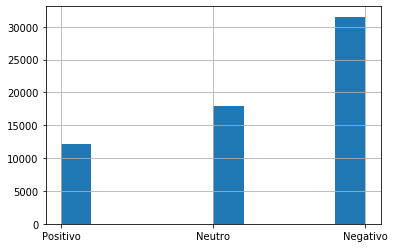

In [9]:
cand3["sentiment"].hist()

In [10]:
cand3

,tweet,sentiment
0,"DESCULPE AMIGO , TE RESPEITO MUITO E GOSTO DAS...",Positivo
1,"Vou continuar votando , na verdade eu também...",Neutro
2,Sdds de Dibella!,Positivo
3,Kkkkk empate? Vou correr lá agora e ajudar a d...,Negativo
4,flopou,Neutro
...,...,...
61655,"Babu: ""Só tem eu aqui da quebrada.""\n(...)\nLu...",Neutro
61656,Primeiro o Px quis dar uma de Lucas palestrinh...,Neutro
61657,Babu falou que é o único da quebrada \n\nAí o ...,Neutro
61658,Fazendo um miojao pra ver o babacao do Lucas i...,Negativo


# Quantidades absolutas

In [11]:
candidates = {"babu": cand1, "victor_hugo": cand2, "lucas": cand3}

In [12]:
qtds_df = get_raw_quantities(candidates)

In [13]:
qtds_df

,positivos,neutros,negativos
nome,,,
babu,6766,10814,18799
victor_hugo,2807,4560,4979
lucas,12173,17964,31523


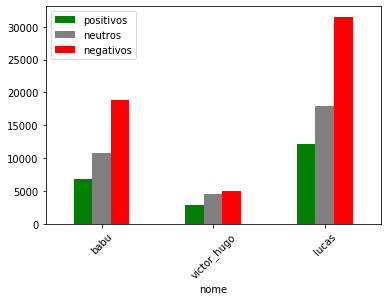

In [14]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação aos total de tweets de cada candidato

In [15]:
pcts_df = get_pct_by_candidate(candidates)

In [16]:
pcts_df

,positivos,neutros,negativos
nome,,,
babu,0.185986,0.297259,0.516754
victor_hugo,0.227361,0.369350,0.403289
lucas,0.197421,0.291340,0.511239


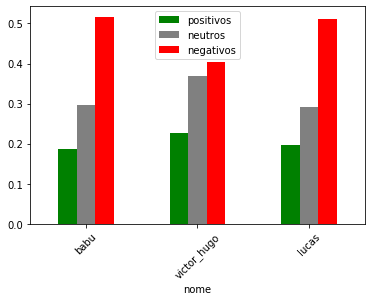

In [17]:
pcts_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação ao total de tweets por categoria

In [18]:
qtds_df_copy = qtds_df.copy()

In [19]:
qtds_df["positivos"] /= qtds_df["positivos"].sum() 
qtds_df["neutros"] /= qtds_df["neutros"].sum()
qtds_df["negativos"] /= qtds_df["negativos"].sum()

In [20]:
qtds_df

,positivos,neutros,negativos
nome,,,
babu,0.311138,0.324375,0.339940
victor_hugo,0.129081,0.136781,0.090035
lucas,0.559781,0.538845,0.570026


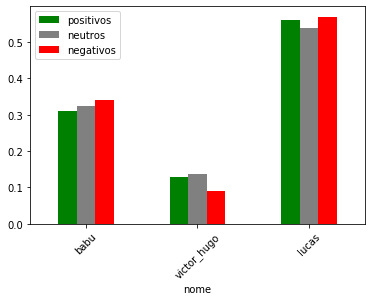

In [21]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Seleção de atributos

In [22]:
atributes_df = qtds_df_copy.join(pcts_df, rsuffix="_pct")

In [23]:
participantes_info = get_participantes_info()
paredoes_info = get_paredoes_info()

In [24]:
followers = [participantes_info[participante]["seguidores"] for participante in atributes_df.index]


In [25]:
paredao_info = paredoes_info[PAREDAO]["candidatos"]
results_info = {candidate["nome"]: candidate["porcentagem"]/100 for candidate in paredao_info}
rejection = [results_info[participante] for participante in atributes_df.index]

In [26]:
atributes_df["seguidores"], atributes_df["rejeicao"] = followers, rejection

In [27]:
atributes_df

,positivos,neutros,negativos,positivos_pct,neutros_pct,negativos_pct,seguidores,rejeicao
nome,,,,,,,,
babu,6766,10814,18799,0.185986,0.297259,0.516754,317268,0.0130
victor_hugo,2807,4560,4979,0.227361,0.369350,0.403289,14044,0.3608
lucas,12173,17964,31523,0.197421,0.291340,0.511239,22688,0.6262


In [28]:
atributes_df.to_csv("data/{}/paredao_atributes.csv".format(PAREDAO))